<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/03_Convolutional_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download zip file
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-23 00:29:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.1.208, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   306MB/s    in 0.3s    

2022-05-23 00:29:52 (306 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspect data
import os

for dirpath, dirs, files in os.walk("pizza_steak"):
  print(f"Current path: {dirpath}, Number of dirs: {len(dirs)}, Number of files: {len(files)}")

Current path: pizza_steak, Number of dirs: 2, Number of files: 0
Current path: pizza_steak/train, Number of dirs: 2, Number of files: 0
Current path: pizza_steak/train/steak, Number of dirs: 0, Number of files: 750
Current path: pizza_steak/train/pizza, Number of dirs: 0, Number of files: 750
Current path: pizza_steak/test, Number of dirs: 2, Number of files: 0
Current path: pizza_steak/test/steak, Number of dirs: 0, Number of files: 250
Current path: pizza_steak/test/pizza, Number of dirs: 0, Number of files: 250


In [ ]:
os.listdir("pizza_steak/train/steak")

['3621562.jpg',
 '314359.jpg',
 '720060.jpg',
 '1548239.jpg',
 '2629750.jpg',
 '38442.jpg',
 '1367035.jpg',
 '332232.jpg',
 '2230959.jpg',
 '640539.jpg',
 '2661577.jpg',
 '1539499.jpg',
 '320658.jpg',
 '3556871.jpg',
 '2365287.jpg',
 '1563266.jpg',
 '910672.jpg',
 '1724387.jpg',
 '1081258.jpg',
 '525041.jpg',
 '100135.jpg',
 '2614189.jpg',
 '3271253.jpg',
 '2909031.jpg',
 '3204977.jpg',
 '1976160.jpg',
 '2984311.jpg',
 '2628106.jpg',
 '2136662.jpg',
 '40094.jpg',
 '2490489.jpg',
 '1209120.jpg',
 '2374582.jpg',
 '945791.jpg',
 '1826066.jpg',
 '227576.jpg',
 '143490.jpg',
 '239025.jpg',
 '2489716.jpg',
 '937133.jpg',
 '1658186.jpg',
 '295491.jpg',
 '461689.jpg',
 '3788729.jpg',
 '3868959.jpg',
 '1295457.jpg',
 '3388717.jpg',
 '3609394.jpg',
 '405173.jpg',
 '3807440.jpg',
 '140832.jpg',
 '3812039.jpg',
 '217250.jpg',
 '2425389.jpg',
 '1772039.jpg',
 '461187.jpg',
 '149682.jpg',
 '3538682.jpg',
 '2940621.jpg',
 '812163.jpg',
 '2534567.jpg',
 '358045.jpg',
 '2403776.jpg',
 '1675632.jpg',
 '

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(parent_path, class_name):
  random.seed(42)
  img_path = random.sample(os.listdir(parent_path), 1)
  image = mpimg.imread(os.path.join(parent_path, img_path[0]))
  plt.imshow(image)
  plt.title(class_name)
  plt.axis("off")

In [12]:
  parent_path = "pizza_steak/train/steak"
  class_name = "steak"
  show_random_image(parent_path, class_name)

NameError: ignored

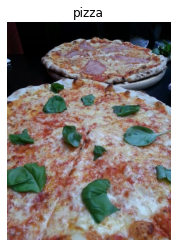

In [ ]:
  parent_path = "pizza_steak/train/pizza"
  class_name = "pizza"
  show_random_image(parent_path, class_name)

In [ ]:
# Preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_path = "pizza_steak/train"
test_path = "pizza_steak/test"

train_data = train_gen.flow_from_directory(directory=train_path,
                                           target_size=(224, 224),
                                           class_mode="binary",
                                           seed=42,
                                           batch_size=32)
test_data = test_gen.flow_from_directory(directory=test_path,
                                         target_size=(224, 224),
                                         class_mode="binary",
                                         seed=42,
                                         batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
# Build CNN

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model.fit(train_data,epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 210ms/step - loss: 0.6090 - accuracy: 0.6460 - val_loss: 0.3952 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4191 - accuracy: 0.8053 - val_loss: 0.3622 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 0.4073 - accuracy: 0.8107 - val_loss: 0.4260 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 13s 275ms/step - loss: 0.3766 - accuracy: 0.8427 - val_loss: 0.3365 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3571 - accuracy: 0.8420 - val_loss: 0.2842 - val_accuracy: 0.8780


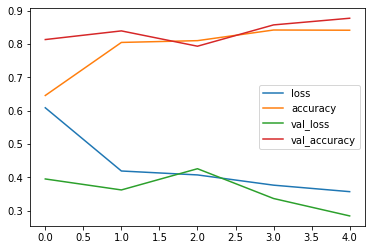

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/pizza_steak"):
  print(f"Current Path: {dirpath}, number of directories: {len(dirnames)}, number of files: {len(filenames)}")

Current Path: /content/pizza_steak, number of directories: 2, number of files: 0
Current Path: /content/pizza_steak/test, number of directories: 2, number of files: 0
Current Path: /content/pizza_steak/test/pizza, number of directories: 0, number of files: 250
Current Path: /content/pizza_steak/test/steak, number of directories: 0, number of files: 250
Current Path: /content/pizza_steak/train, number of directories: 2, number of files: 0
Current Path: /content/pizza_steak/train/pizza, number of directories: 0, number of files: 750
Current Path: /content/pizza_steak/train/steak, number of directories: 0, number of files: 750


(-0.5, 511.5, 511.5, -0.5)

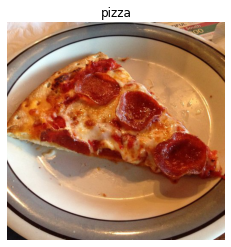

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

parent_dir = "/content/pizza_steak/train/"
class_name = "pizza"
file_path = os.path.join(parent_dir, class_name)

image = mpimg.imread(os.path.join(file_path,
                                  random.sample(os.listdir(file_path), 1)[0]))

plt.imshow(image)
plt.title(class_name)
plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory="pizza_steak/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode="binary")
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test",
                                             target_size=(224, 224),
                                             batch_size=32,
                                             seed=42,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 328ms/step - loss: 0.5550 - accuracy: 0.7080 - val_loss: 0.4360 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 15s 322ms/step - loss: 0.4473 - accuracy: 0.7980 - val_loss: 0.3620 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3969 - accuracy: 0.8333 - val_loss: 0.3408 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3485 - accuracy: 0.8640 - val_loss: 0.3184 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.2847 - accuracy: 0.8933 - val_loss: 0.3462 - val_accuracy: 0.8460


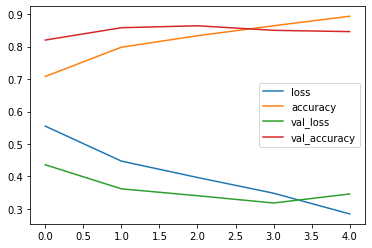

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
history.history["loss"]

[0.5549954175949097,
 0.44730517268180847,
 0.3969014585018158,
 0.34853267669677734,
 0.28474172949790955]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss_curve(history):
  epochs = np.arange(len(history.history["loss"]))
  plt.figure()
  plt.plot(epochs,history.history["loss"], label="loss")
  plt.plot(epochs, history.history["val_loss"], label="val_loss")
  plt.title("The loss")
  plt.legend()

  plt.figure()
  plt.plot(epochs, history.history["accuracy"], label="accuracy")
  plt.plot(epochs, history.history["val_accuracy"], label="val_accuracy")
  plt.title("The accuracy")
  plt.legend()

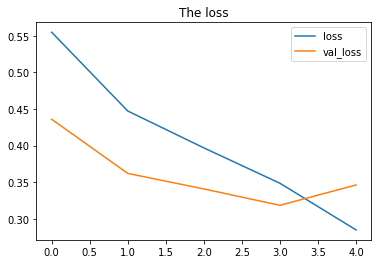

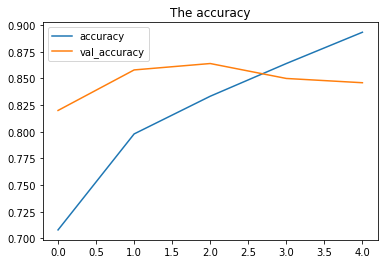

In [ ]:
plot_loss_curve(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_v2 = Sequential([
  Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")
])
model_v2.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])
history_v2 = model_v2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6472 - accuracy: 0.6480 - val_loss: 0.5071 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5097 - accuracy: 0.7707 - val_loss: 0.4314 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4532 - accuracy: 0.8040 - val_loss: 0.3605 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4168 - accuracy: 0.8133 - val_loss: 0.3792 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4010 - accuracy: 0.8213 - val_loss: 0.3372 - val_accuracy: 0.8860


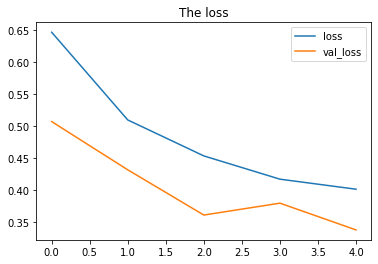

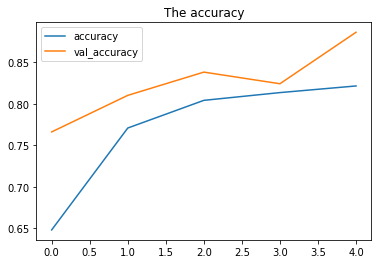

In [ ]:
plot_loss_curve(history_v2)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory="pizza_steak/train",
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary")
train_data = train_datagen.flow_from_directory(directory="pizza_steak/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test",
                                             target_size=(224, 224),
                                             batch_size=32,
                                             seed=42,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


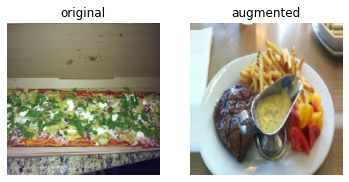

In [ ]:
import random
import matplotlib.pyplot as plt

image, label = train_data.next()
image_aug, label_aug = train_data_augmented.next()
i = random.randint(0, len(image))

plt.subplot(1, 2, 1)
plt.imshow(image[i])
plt.title("original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(image_aug[i])
plt.title("augmented")
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model_v3 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid")                       
])
model_v3.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])
history_v3 = model_v3.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 22s 466ms/step - loss: 0.6549 - accuracy: 0.5973 - val_loss: 0.5788 - val_accuracy: 0.6720
Epoch 2/10
47/47 [==============================] - 22s 461ms/step - loss: 0.5496 - accuracy: 0.7187 - val_loss: 0.4819 - val_accuracy: 0.7540
Epoch 3/10
47/47 [==============================] - 22s 460ms/step - loss: 0.5119 - accuracy: 0.7467 - val_loss: 0.4410 - val_accuracy: 0.7840
Epoch 4/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4881 - accuracy: 0.7647 - val_loss: 0.3451 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 22s 458ms/step - loss: 0.4946 - accuracy: 0.7700 - val_loss: 0.3452 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4885 - accuracy: 0.7633 - val_loss: 0.4156 - val_accuracy: 0.8140
Epoch 7/10
47/47 [==============================] - 21s 458ms/step - loss: 0.4740 - accuracy: 0.7707 - val_loss: 0.3195 - val_accuracy: 0.8600

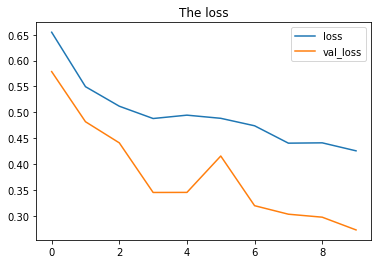

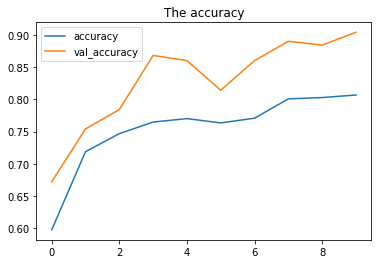

In [ ]:
plot_loss_curve(history_v3)

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen_augmented.flow_from_directory(directory="pizza_steak/train",
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         target_size=(224, 224))
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test",
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224, 224))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model_v4 = tf.keras.Sequential([
  Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, padding="valid"),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid")                                
])

model_v4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_v4 = model_v4.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 465ms/step - loss: 0.5492 - accuracy: 0.7273 - val_loss: 0.3965 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4548 - accuracy: 0.7940 - val_loss: 0.3483 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4295 - accuracy: 0.8133 - val_loss: 0.3382 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4071 - accuracy: 0.8167 - val_loss: 0.3323 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4101 - accuracy: 0.8073 - val_loss: 0.3430 - val_accuracy: 0.8600


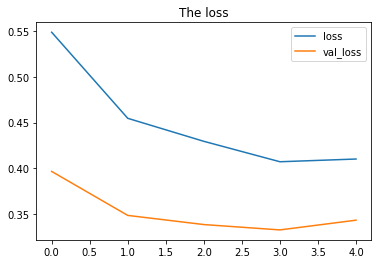

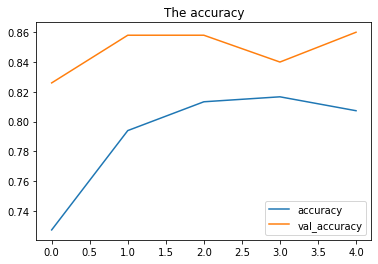

In [9]:
plot_loss_curve(history_v4)

--2022-05-23 00:52:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-05-23 00:52:17 (205 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



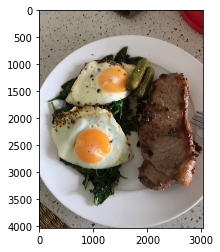

In [14]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak =  mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [15]:
steak.shape

(4032, 3024, 3)

In [17]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [20]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [24]:
pred = model_v4.predict(tf.expand_dims(steak, axis=0))

In [23]:
import os
class_names = os.listdir("pizza_steak/train")
print(class_names)

['pizza', 'steak']


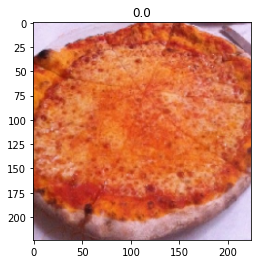

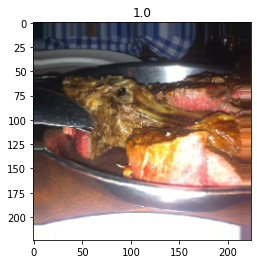

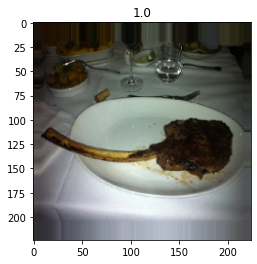

In [31]:
img, label = train_data.next()
for i in range(3):
  plt.figure()
  plt.imshow(img[i])
  plt.title(label[i])

In [33]:
  pred_class = class_names[int(tf.round(pred))]
  pred_class

'steak'